## Data set from: https://www.kaggle.com/carrie1/ecommerce-data
##### One year data, dated from  01/12/2010 and 09/12/2011 

### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Load Files

In [225]:
# read and load file
df = pd.read_csv('Ecommerce_segementation.csv', encoding= 'unicode_escape')
print(df.shape)
df.head(20)

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [5]:
# datatypes of fields
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

### Buyers tend to buy products with high percentage of price reduction.
``` Price reduction defined as: 
        (estimated_retail_price - selling_price)*100/estimated_retail_price
 This same behavior can se seen across buyers who purchased designer product. Off the designer products sold 80% of the product were sold on prices less than 75-90% less than their estimated retail price.
 However, this doesn't mean that any designer product with 75-90% of reduce price WILL be purchased by designer shoppers.```


In [6]:
# missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [97]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## There is negative pricing as well as negative quantity in the dataset... 
##### Is purchase as well as return included in this dataset?  Will investigate this further as we move further in analysis

## Inital analysis

In [172]:
## list of countries in the dataset
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [174]:
## Missing customerID for each country
print('Missing customerID for each country')
df[df['CustomerID'].isnull()]['Country'].value_counts()

Missing customerID for each country


United Kingdom    133600
EIRE                 711
Hong Kong            288
Unspecified          202
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                2
Name: Country, dtype: int64

``` note this necessarily doesn't mean that they are all unique customers ```

### How many unique products has been purchased/ not by count sold?

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

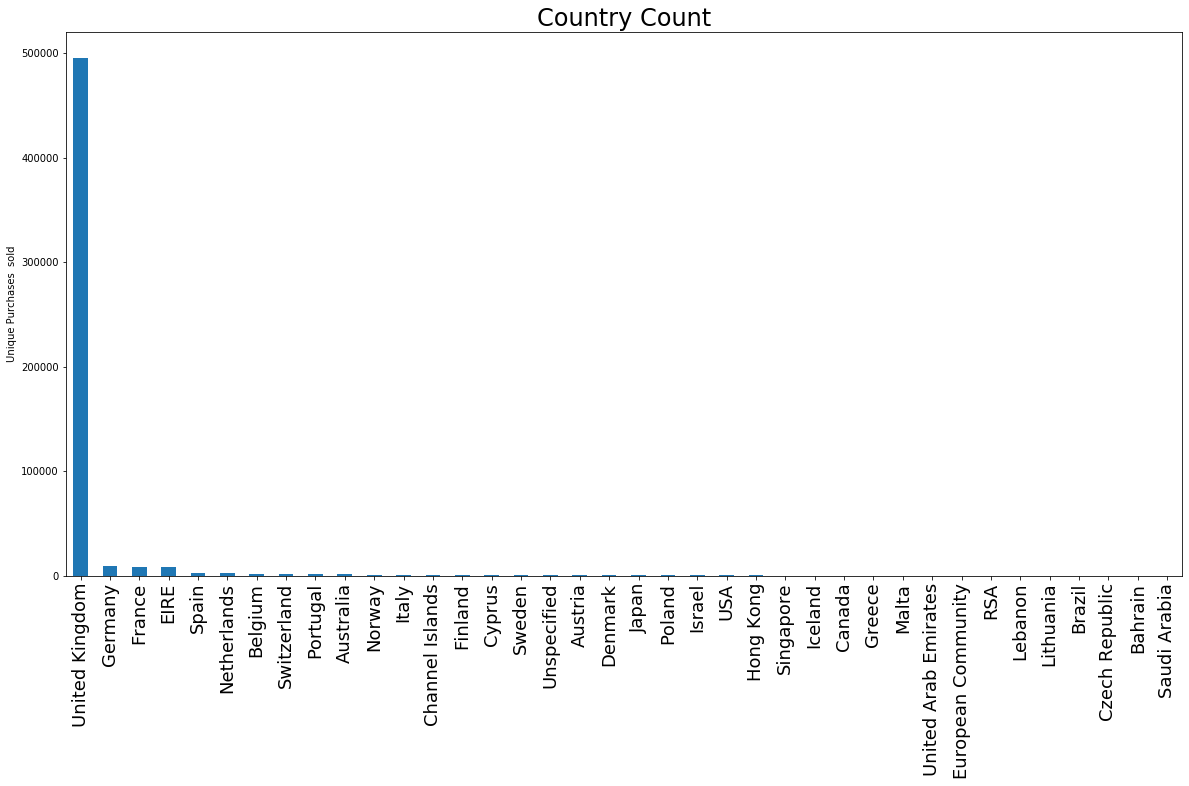

In [18]:
x = df['Country'].value_counts()
print(x)
plt.figure(figsize = (20,10))
plt.title('Country Count',fontsize = 24)
x.plot(kind = 'bar')
plt.ylabel('Unique Purchases  sold')
plt.xticks(fontsize = 18,rotation ='vertical')
plt.show()


 
 Unique Customers   4373
Per Country and Unique Customers


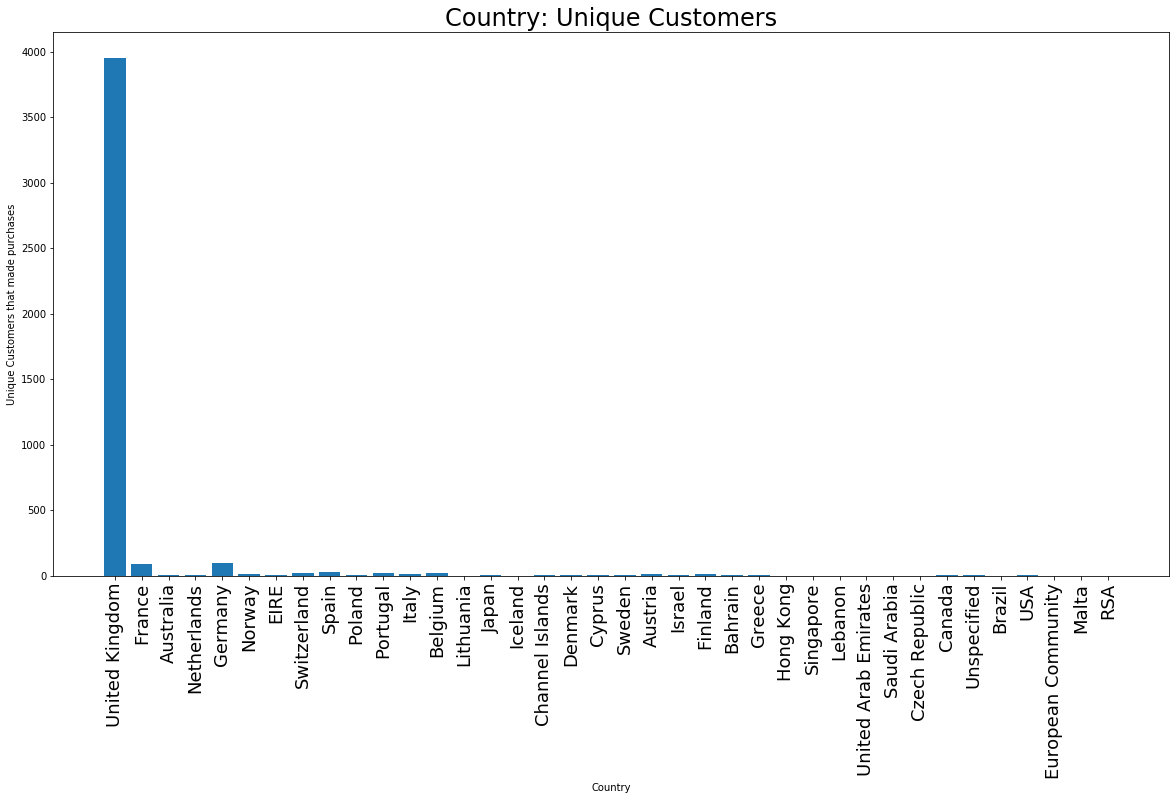

In [209]:
## Per country 
#df.groupby('Country')['CustomerID'].count().sort_values(ascending= False)

## Per Country Unique Customer
print('\n \n Unique Customers  ',len(df['CustomerID'].unique()))
country_ls = df['Country'].unique()
customer_ls = []
print('Per Country and Unique Customers')
for k in country_ls: 
    customer_ls.append(len(df[df['Country']==k]['CustomerID'].unique()))
    
plt.figure(figsize = (20,10))
plt.title('Country: Unique Customers',fontsize = 24)
#x.plot(kind = 'bar')
plt.bar(country_ls,customer_ls)
plt.xlabel('Country')
plt.ylabel('Unique Customers that made purchases')
plt.xticks(fontsize = 18,rotation ='vertical')
plt.show()

In [74]:
## Checking how many CustomerIDs are missing from UK 
df[df['Country']=='United Kingdom']['CustomerID'].isnull().value_counts()

False    361878
True     133600
Name: CustomerID, dtype: int64

In [83]:
## For user segmentation problem, will just concentrate on UK because it has most customers and most purchases made

df_new = df[(df['Country'] =='United Kingdom') & (df['CustomerID'].notnull())]
df_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


In [102]:
## Investigating into the -ive quantity and unitprices !!
df_new.loc[(df_new['Quantity'] < 1) & (df_new['UnitPrice'] <= 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


``` the above filtering took care of -ive qunatity and unitprice
and looking into either -ive quantity or -ive unitprice 
```

In [103]:
df_new.loc[(df_new['Quantity'] < 1) | (df_new['UnitPrice'] <= 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [114]:
u_p = df_new.loc[df_new['UnitPrice'] <= 0]
print(len(u_p))
u_p

24


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom
187613,553000,47566,PARTY BUNTING,4,5/12/2011 15:21,0.0,17667.0,United Kingdom
279324,561284,22167,OVAL WALL MIRROR DIAMANTE,1,7/26/2011 12:24,0.0,16818.0,United Kingdom


``` The above <= 0 unitprice data doesn't provide much insight/pattern. Also it's just 24rows of 7557rows```

In [116]:
neg_q = df_new.loc[df_new['Quantity'] < 1]
neg_q 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [123]:
## Negative Quantity InvoiceNo starts with 'C' ?
neg_q['InvoiceNo'].astype(str).str[0].value_counts()

C    7533
Name: InvoiceNo, dtype: int64

In [136]:
## so it's some type of action.. can be return as well.. check if same invoice without c is represent in data with same customerid
cid = neg_q['InvoiceNo'].astype(str).str[1:].values
cid

array(['536379', '536383', '536391', ..., '581568', '581569', '581569'],
      dtype=object)

In [141]:
df_new[df_new['InvoiceNo'].isin(cid)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [142]:
df[df['InvoiceNo'].isin(cid)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


``` C in InvoiceNo doesn't create a pattern ```

In [154]:
df_new.loc[(df_new['CustomerID'] == 17548.0)].sort_values('Description')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/2010 10:24,3.45,17548.0,United Kingdom
165028,550755,22926,IVORY GIANT GARDEN THERMOMETER,4,4/20/2011 12:01,5.95,17548.0,United Kingdom
177223,C552049,22926,IVORY GIANT GARDEN THERMOMETER,-4,5/6/2011 10:00,5.95,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
165024,550755,22585,PACK OF 6 BIRDY GIFT TAGS,24,4/20/2011 12:01,1.25,17548.0,United Kingdom
177224,C552049,22585,PACK OF 6 BIRDY GIFT TAGS,-24,5/6/2011 10:00,1.25,17548.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/2010 10:24,1.65,17548.0,United Kingdom


## The above sample set confirms that these are the returning items... and we also notice some -ive quantities on min date of our dataset indicating that these items where purchased before our min date

In [171]:
## more analysis on what time of products are been returned

negDes_ls = neg_q['Description'].unique()
print('Returned Products ')
for k in negDes_ls: 
    print(k, '\t',neg_q[neg_q['Description']==k]['UnitPrice'].unique())

Returned Products 
Discount 	 [2.75000e+01 2.92900e+01 2.81000e+02 2.67120e+02 5.76000e+00 4.25000e+01
 2.69300e+01 1.38800e+01 2.29700e+01 6.42700e+01 6.59100e+01 8.48000e+01
 7.00100e+01 3.03800e+01 1.00000e-02 9.87000e+00 1.62240e+02 1.45200e+01
 1.86786e+03 1.20000e+02 1.17600e+01 1.18400e+01 3.00000e-02 1.45000e+00
 9.84000e+00 1.59600e+01 2.00000e-01 4.20000e+01 2.09200e+01 2.80400e+01
 7.00000e-01 1.29900e+02 1.44200e+01 1.00000e+01 1.39900e+01 1.21500e+01
 6.62400e+01 4.56000e+01 2.60500e+01 6.40000e+01 9.60000e+00 1.15200e+01
 1.66700e+01 1.50700e+01 1.00600e+01 1.30000e+01 6.61700e+01 3.37500e+01
 3.63000e+01 3.83900e+01 5.76000e+01 1.45000e+01 1.10430e+02 4.53300e+01
 2.07500e+01 1.50000e+01 1.02240e+02 1.86200e+01 1.67400e+01 1.60700e+01
 2.32700e+01 3.97000e+01 1.15900e+01 9.71400e+01 1.83000e+02 6.00000e+00
 2.72600e+01 1.48800e+01 1.98200e+01 1.67600e+01 2.05300e+01 2.86800e+01]
SET OF 3 COLOURED  FLYING DUCKS 	 [4.65 5.45]
PLASTERS IN TIN CIRCUS PARADE  	 [1.65]
PACK OF

PACK OF 60 DINOSAUR CAKE CASES 	 [0.55 0.42]
RETROSPOT LARGE MILK JUG 	 [4.95 4.25]
RED RETROSPOT ROUND CAKE TINS 	 [9.95]
SET OF 72 RETROSPOT PAPER  DOILIES 	 [1.45 1.25]
RETROSPOT TEA SET CERAMIC 11 PC  	 [4.25 4.95]
ROUND CONTAINER SET OF 5 RETROSPOT 	 [1.65]
ORGANISER WOOD ANTIQUE WHITE  	 [8.5]
12 PENCIL SMALL TUBE WOODLAND 	 [0.65]
PAPER CHAIN KIT RETROSPOT 	 [2.95]
RETROSPOT CANDLE  SMALL 	 [1.69 0.42]
UNION JACK FLAG PASSPORT COVER  	 [2.1]
HAND WARMER UNION JACK 	 [2.1]
WOOD S/3 CABINET ANT WHITE FINISH 	 [7.95 8.95 8.15]
WOOD 2 DRAWER CABINET WHITE FINISH 	 [5.95 4.95 6.95]
BLUE NEW BAROQUE CANDLESTICK CANDLE 	 [0.85]
PHARMACIE FIRST AID TIN 	 [6.75]
SET/3 VANILLA SCENTED CANDLE IN BOX 	 [4.25 3.81]
NATURAL SLATE HEART CHALKBOARD  	 [2.95 2.55]
PINK FOXGLOVE ARTIIFCIAL FLOWER 	 [2.55]
ENCHANTED BIRD COATHANGER 5 HOOK 	 [4.65]
CHRISTMAS LIGHTS 10 REINDEER 	 [8.5  7.65]
BLACK CHAMPAGNE GLASS 	 [1.65 0.39]
MA CAMPAGNE CUTLERY BOX 	 [14.95 12.75]
STRAWBERRY CERAMIC TRINKET BOX 	 

FAIRY CAKE BIRTHDAY CANDLE SET 	 [3.75]
POTTING SHED TEA MUG 	 [1.25 1.06]
MRS ROBOT SOFT TOY 	 [1.95]
WHITE WOOD GARDEN PLANT LADDER 	 [8.5  9.95]
HAND OVER THE CHOCOLATE   SIGN  	 [1.69 2.1  1.85]
RED STRIPE CERAMIC DRAWER KNOB 	 [1.06 1.25 1.45]
RED DRAWER KNOB ACRYLIC EDWARDIAN 	 [1.06 1.25]
TEA BAG PLATE RED RETROSPOT 	 [0.85]
RECIPE BOX RETROSPOT  	 [2.95 2.55]
ASSORTED COLOURS SILK FAN 	 [0.75 0.65 0.83]
BEADED PEARL HEART WHITE ON STICK 	 [0.42 1.25]
RETROSPOT CANDLE  MEDIUM 	 [0.65]
HANGING HEART JAR T-LIGHT HOLDER 	 [1.25 1.06]
SET OF 3 CAKE TINS PANTRY DESIGN  	 [4.95 4.25]
METAL SIGN CUPCAKE SINGLE HOOK 	 [0.42]
METAL SIGN,CUPCAKE SINGLE HOOK 	 [0.42]
POPPY'S PLAYHOUSE BEDROOM  	 [2.1]
TEA TIME KITCHEN APRON 	 [4.65 5.95]
HANGING HEART ZINC T-LIGHT HOLDER 	 [0.85 0.64]
HANGING JAM JAR T-LIGHT HOLDER 	 [0.85 0.72]
SET/4 DAISY MIRROR MAGNETS 	 [2.1  0.29]
TOOL BOX SOFT TOY  	 [8.95]
FELTCRAFT DOLL EMILY 	 [2.95]
SMALL RED RETROSPOT MUG IN BOX  	 [3.75 0.5  3.39]
HOT WATER BOT

CREAM SWEETHEART MAGAZINE RACK 	 [14.95 16.95]
SET OF 3 GOLD FLYING DUCKS 	 [1.95]
FRENCH LAUNDRY SIGN BLUE METAL 	 [1.45]
RED RETROSPOT OVEN GLOVE DOUBLE 	 [2.95]
ASSORTED EASTER DECORATIONS  BELLS 	 [1.25]
CURIOUS  IMAGES NOTEBOOK SET 	 [4.25]
CHEST OF DRAWERS GINGHAM HEART  	 [16.95]
MEDIUM WHITE/PINK ROSE ART FLOWER 	 [1.69]
SMALL WHITE/PINK ROSE ART FLOWER 	 [1.25]
CLEAR DRAWER KNOB ACRYLIC EDWARDIAN 	 [1.25]
S/15 SILVER GLASS BAUBLES IN BAG 	 [1.06]
BLUE WIRE SPIRAL CANDLE HOLDER 	 [6.35]
HANGING METAL STAR LANTERN 	 [1.65 1.45]
VINTAGE BILLBOARD DRINK ME MUG 	 [1.06]
HOME BUILDING BLOCK WORD 	 [5.95 5.45 6.25]
SET OF 2 TEA TOWELS APPLE AND PEARS 	 [2.95]
RETROSPOT PARTY BAG + STICKER SET 	 [1.65]
PLASTERS IN TIN SPACEBOY 	 [1.65]
SPACEBOY LUNCH BOX  	 [1.95 1.65]
CABIN BAG VINTAGE RETROSPOT 	 [29.95]
ASSORTED TUTTI FRUTTI PEN 	 [0.85 0.29]
PINK  HEART SHAPE LOVE BUCKET  	 [2.95 2.55]
HAND WARMER SCOTTY DOG DESIGN 	 [2.1  1.85]
LUNCH BAG SPACEBOY DESIGN  	 [1.65 1.45]
WHITE HEART

DECORATIVE HANGING SHELVING UNIT 	 [59.95]
RED RETROSPOT OVEN GLOVE  	 [1.06 1.25]
GLITTER HEART GARLAND WITH BELLS  	 [3.75]
SNOWSTORM PHOTO FRAME FRIDGE MAGNET 	 [0.85]
SILVER PHOTO FRAME 	 [2.1]
PARTY METAL SIGN  	 [1.45]
PLACE SETTING WHITE STAR 	 [0.42]
ZINC WILLIE WINKIE  CANDLE STICK 	 [0.85]
WORLD WAR 2 GLIDERS ASSTD DESIGNS 	 [0.29 0.21 0.11]
JUMBO BAG SPACEBOY DESIGN 	 [1.95 2.08 1.79]
JUMBO BAG SCANDINAVIAN BLUE PAISLEY 	 [1.95 1.79 2.08 1.65]
RED RETROSPOT SHOPPING BAG 	 [2.55]
EDWARDIAN PARASOL BLACK 	 [5.95 4.95]
TRAVEL CARD WALLET KEEP CALM 	 [0.42]
GROW YOUR OWN HERBS SET OF 3 	 [7.95]
SET/2 RED RETROSPOT TEA TOWELS  	 [2.75]
SET 6 FOOTBALL CELEBRATION CANDLES 	 [1.25]
STRAWBERRY RAFFIA FOOD COVER 	 [3.75]
DAIRY MAID TOASTRACK 	 [0.79]
CERAMIC BOWL WITH STRAWBERRY DESIGN 	 [2.95]
HEN HOUSE DECORATION 	 [1.65]
SWEETHEART KEY CABINET 	 [5.55]
CHARLIE + LOLA BISCUITS TINS 	 [1.95]
BLUE STRIPE CERAMIC DRAWER KNOB 	 [1.06 1.25 1.45]
BLUE POLKADOT COFFEE MUG 	 [0.39]
SMALL RE

GLASS BON BON JAR 	 [1.65 1.95]
BOOZE & WOMEN GREETING CARD  	 [0.42]
KNEELING MAT HOUSEWORK  DESIGN 	 [1.65 0.79]
FLAG OF ST GEORGE CHAIR 	 [5.95]
BULL DOG BOTTLE TOP WALL CLOCK 	 [8.25]
LUNCH BAG DOILEY PATTERN  	 [1.65]
RAIN PONCHO RETROSPOT 	 [0.85]
BIG DOUGHNUT FRIDGE MAGNETS 	 [0.85]
VINTAGE CREAM 3 BASKET CAKE STAND 	 [4.65 9.95]
POLKADOT RAIN HAT  	 [0.42]
RED GINGHAM ROSE JEWELLERY BOX 	 [1.95 1.65]
KEY FOB , SHED 	 [0.65]
FILIGREE HEART BIRD WHITE  	 [1.04]
VINTAGE KEEPSAKE BOX PINK FLOWER 	 [6.35]
HERB MARKER BASIL 	 [0.55 0.65]
JINGLE BELL HEART DECORATION 	 [1.65]
SMALL HEART FLOWERS HOOK  	 [0.85]
MINIATURE ANTIQUE ROSE HOOK IVORY 	 [0.83]
SET OF TEA COFFEE SUGAR TINS PANTRY 	 [4.95 4.15]
KEY FOB , FRONT  DOOR  	 [0.65]
KEY FOB , BACK DOOR  	 [0.65]
CLASSIC FRENCH STYLE BASKET GREEN  	 [3.95]
16 PIECE CUTLERY SET PANTRY DESIGN 	 [15.95]
BASKET OF FLOWERS SEWING KIT 	 [0.85]
BUFFALO BILL TREASURE BOOK BOX 	 [2.25]
SET OF 3 REGENCY CAKE TINS 	 [4.95 4.15]
CANDY SPOT CUSHION

VINTAGE BILLBOARD TEA MUG 	 [1.06]
BLUE  VOILE LAMPSHADE 	 [2.55]
BLACK VINTAGE  CRYSTAL EARRINGS 	 [3.75]
HEART SHAPED HOLLY WREATH 	 [4.15]
TRAVEL CARD WALLET VINTAGE TICKET 	 [0.42]
NOEL WOODEN BLOCK LETTERS  	 [5.95]
JUMBO BAG VINTAGE DOILY  	 [2.08 1.79]
3 TRADITIONAl BISCUIT CUTTERS  SET 	 [2.1]
SQUARE CHERRY BLOSSOM CABINET 	 [5.95]
BEWARE OF THE CAT METAL SIGN  	 [1.69]
TEA TIME TEA SET IN GIFT BOX 	 [6.95]
WAKE UP COCKEREL TILE HOOK 	 [0.39]
FRENCH STYLE STORAGE JAR JAM 	 [0.29]
PINK  HONEYCOMB PAPER FAN 	 [0.65]
PASTEL COLOUR HONEYCOMB FAN 	 [0.39]
SKETCHBOOK MAGNETIC SHOPPING LIST 	 [1.45]
TRIANGULAR POUFFE VINTAGE  	 [14.95]
ORANGE SCENTED SET/9 T-LIGHTS 	 [0.85]
CINAMMON SET OF 9 T-LIGHTS 	 [0.85]
WHITE TALL PORCELAIN T-LIGHT HOLDER 	 [2.55 1.95]
SMALL BONNE JAM JAR  T-LIGHT HOLDER 	 [2.08]
T-LIGHT HOLDER SILVER HEART HANDLE 	 [1.95]
VINTAGE GLASS T-LIGHT HOLDER 	 [0.83]
SINGLE HEART ZINC T-LIGHT HOLDER 	 [0.95]
ZINC T-LIGHT HOLDER STAR LARGE 	 [0.95]
ZINC  STAR T-LIGHT HO

ROLL WRAP 50'S CHRISTMAS 	 [1.04]
STRIPEY CHOCOLATE NESTING BOXES 	 [2.55]
IVORY CHANDELIER T-LIGHT HOLDER 	 [1.5 1. ]
MIRROR MOSAIC GOBLET CANDLE HOLDER 	 [0.95]
MIRROR MOSAIC T-LIGHT HOLDER  	 [0.39]
MIRROR MOSAIC VOTIVE HOLDER 	 [0.39]
HANGING HEART BONHEUR 	 [0.85]
GLASS TWIST BON BON JAR 	 [6.65]
I'M ON HOLIDAY METAL SIGN 	 [2.1]
BOTANICAL GARDENS WALL CLOCK  	 [20.8 25.  20.5]
SHELF WITH 4 HOOKS HOME SWEET HOME 	 [6.25]
VINTAGE BILLBOARD LOVE/HATE MUG 	 [1.06 1.25]
CHRISTMAS TOILET ROLL 	 [1.06 1.25]
3D CHRISTMAS STAMPS STICKERS  	 [1.25]
VANILLA SCENT CANDLE JEWELLED BOX 	 [1.   3.81]
MARIE ANTOINETTE TRINKET BOX SILVER 	 [3.]
ZINC FOLKART SLEIGH BELLS 	 [1.69 1.49]
DOLLY CABINET 3 DRAWERS  	 [14.95]
DOLLY CABINET 2 DRAWERS  	 [12.5]
PACK OF 6 SWEETIE GIFT BOXES 	 [2.55]
SET OF 36 VINTAGE CHRISTMAS DOILIES 	 [1.45]
TUSCAN VILLA DOVECOTE BIRD FEEDER 	 [8.25]
CARD CHRISTMAS VILLAGE 	 [0.42]
MINI PLAYING CARDS DOLLY GIRL  	 [0.42]
CABIN BAG VINTAGE PAISLEY 	 [24.95]
GLASS APOTHECAR

``` alot of further analyis can be done on the price at which products are sold and returned ...But it's out of scope of customer segmentation analysis ``` 

# We plan on dropping only the -ive qunatity or products return rows... and keep all the purchased(+quantity rows) because the customer did actually purchased them.. which means they have had intent and interest in that product... 

In [177]:
print('Before dropping -ive quantities: ',df_new.shape)
df_new = df_new.drop(df_new.index[df_new['Quantity'] < 1])
print('After dropping -ive quantities: ',df_new.shape)

Before dropping -ive quantities:  (361878, 8)
After dropping -ive quantities:  (354345, 8)


### Famous Products/item, Most indemand 



In [216]:
print('Most Often Purchased')
df_new['Description'].value_counts()

Most Often Purchased


WHITE HANGING HEART T-LIGHT HOLDER    1940
JUMBO BAG RED RETROSPOT               1464
REGENCY CAKESTAND 3 TIER              1426
ASSORTED COLOUR BIRD ORNAMENT         1333
PARTY BUNTING                         1308
                                      ... 
CLASSIC CROME BICYCLE BELL               1
CAKESTAND, 3 TIER, LOVEHEART             1
TEA TIME BREAKFAST BASKET                1
WRAP A PRETTY THANK YOU                  1
BLACK DIAMOND CLUSTER NECKLACE           1
Name: Description, Length: 3844, dtype: int64

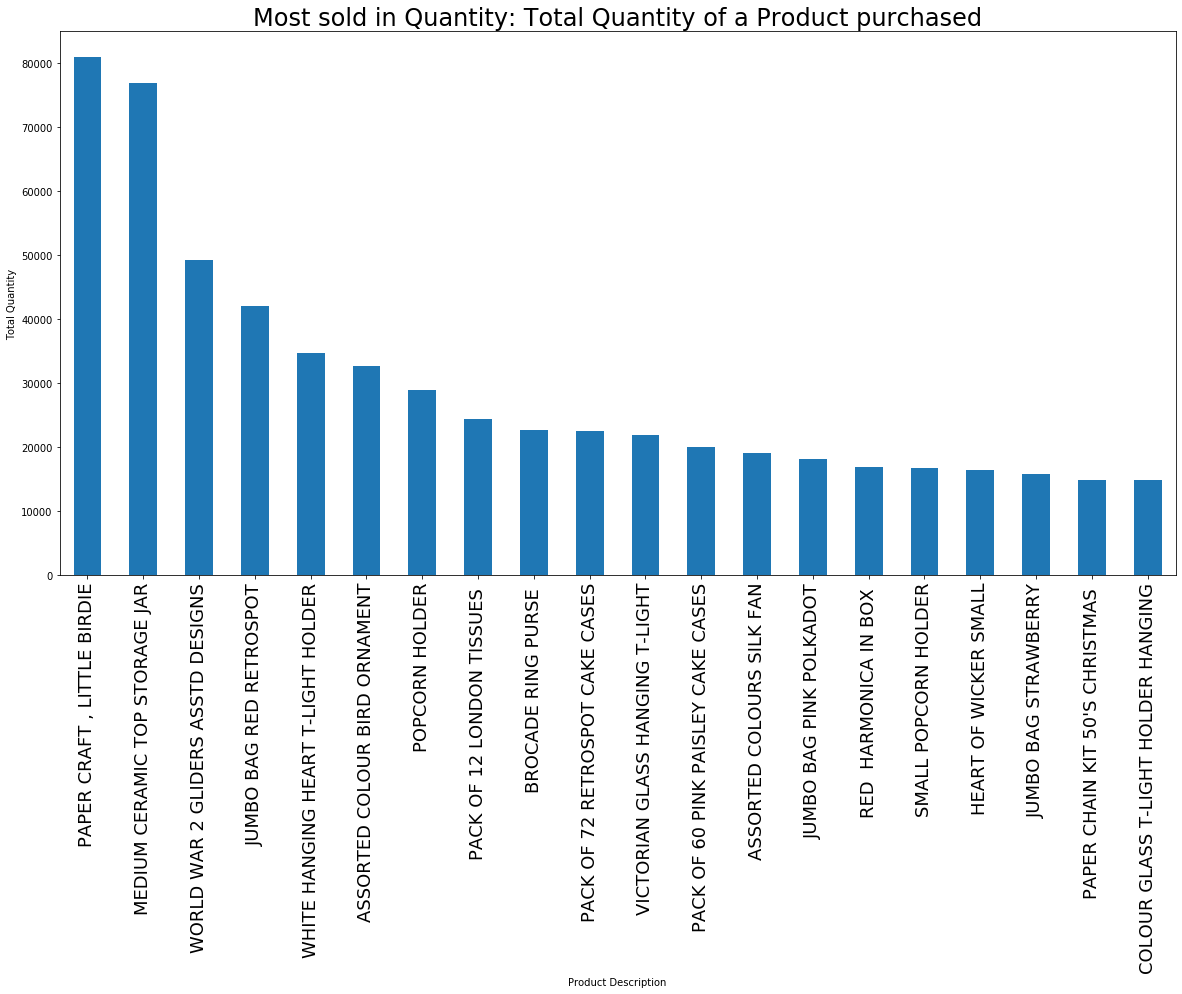

In [218]:
x1 = df_new.groupby('Description')['Quantity'].sum().sort_values(ascending = False)

x = x1.head(20)
plt.figure(figsize = (20,10))
plt.title('Most sold in Quantity: Total Quantity of a Product purchased',fontsize = 24)
x.plot(kind = 'bar')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity')
plt.xticks(fontsize = 18,rotation ='vertical')
plt.show()

In [219]:
df_new.groupby('Description')['Quantity'].describe()

,count,mean,std,min,25%,50%,75%,max
Description,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,38.0,3.526316,3.950620,1.0,1.0,1.5,4.0,12.0
50'S CHRISTMAS GIFT BAG LARGE,98.0,17.316327,39.691490,2.0,12.0,12.0,12.0,400.0
DOLLY GIRL BEAKER,105.0,6.295238,6.577824,1.0,1.0,3.0,12.0,48.0
I LOVE LONDON MINI BACKPACK,57.0,3.175439,2.252957,1.0,1.0,3.0,4.0,12.0
NINE DRAWER OFFICE TIDY,26.0,1.692308,1.378963,1.0,1.0,1.0,2.0,6.0
...,...,...,...,...,...,...,...,...
ZINC T-LIGHT HOLDER STARS SMALL,221.0,19.266968,28.024766,1.0,12.0,12.0,12.0,216.0
ZINC TOP 2 DOOR WOODEN SHELF,9.0,1.111111,0.333333,1.0,1.0,1.0,1.0,2.0
ZINC WILLIE WINKIE CANDLE STICK,173.0,11.601156,8.114543,1.0,6.0,12.0,12.0,48.0


In [229]:
df_new['Total_Price'] = df_new['UnitPrice'] *df_new['Quantity']
df_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom,214.80


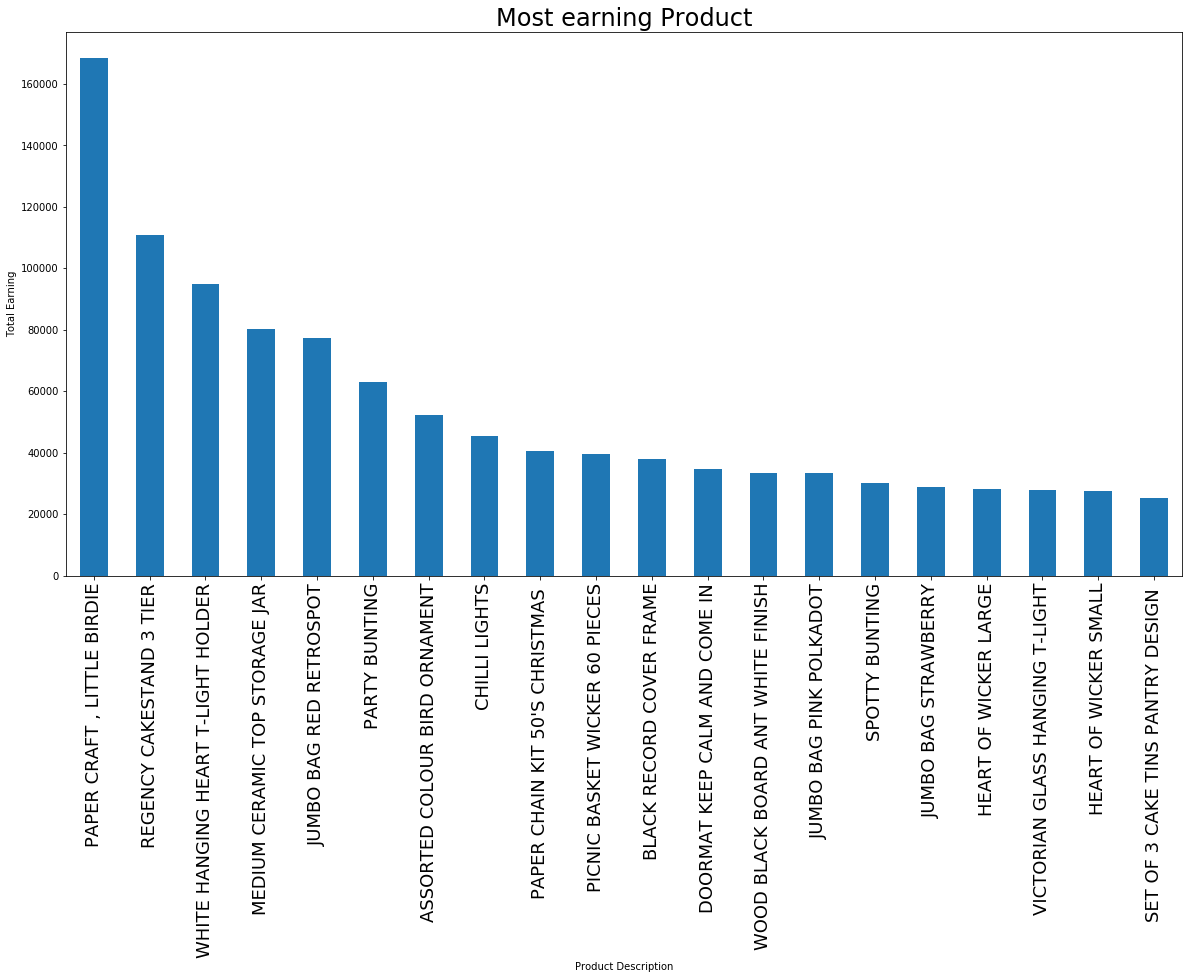

In [233]:
## Product most earned On in given year
x1 = df_new.groupby('Description')['Total_Price'].sum().sort_values(ascending= False)

x = x1.head(20)
plt.figure(figsize = (20,10))
plt.title('Most earning Product',fontsize = 24)
x.plot(kind = 'bar')
plt.xlabel('Product Description')
plt.ylabel('Total Earning')
plt.xticks(fontsize = 18,rotation ='vertical')
plt.show()


In [ ]:
## Plot of pricing for each product
x1 = df_new.groupby('Description')['UnitPrice'].mean()


x = x1.where(x1 > 100)

plt.figure(figsize = (20,10))
plt.title('Mean price of Product',fontsize = 24)
x.plot()
plt.xlabel('Product Description')
plt.ylabel('Mean Price')
plt.xticks(fontsize = 18,rotation ='vertical')
plt.show()

# How would you define Customer Segments?

```Who buys the product frequently, sometimes, rarely/never? - Frequency. 
  Who spends large on amount on product, average amount, little/none? - Monetary.
  When was the last time the buyer they made purchase? - Receny. 
  
  Customers can ranked based on these Recency(R), Frequency(F), Monetary(M) values
  Finally the lowest recency value, highest frequency, and the highest monetary amounts can be classified as our best designer shopper. ```

## Will use the concept and variation of RFM (Receny-Frequency-Monetary) to segment Customers into High, Average and Low valued based on a year data

In [287]:
## convert InvoiceDate column to datetime object
df_new['InvoiceDate'] = pd.to_datetime(df_new['InvoiceDate'])


In [324]:
last_date = pd.to_datetime('12/10/2011')
## build receny
def recency(purchaseDate):
    return  (last_date - purchaseDate.max()).days

In [325]:
## Calcualte Recency, Frequency and Monetary from the given features
def calculate_rfm():
    return df_new.groupby('CustomerID').agg(
            recency = ('InvoiceDate',recency),
            frequency = ('InvoiceNo','count'),
            monetary = ('Total_Price','sum'))
#            total_value = (['UnitPrice','sum'))

In [327]:
customers = calculate_rfm()
customers


,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [328]:
## split each feature into 4 quartiles
def measure_rfm(customers):
    rfm = customers[['recency', 'frequency', 'monetary']]

    # recency quartile segmentation
    r_labels = range(4, 0, -1)
    recency = rfm['recency']
    r_quartiles, bins = pd.qcut(recency, 4, labels=r_labels, retbins=True)
    rfm = rfm.assign(R=r_quartiles.values)

    # frequency quartile segmentation
    f_labels = range(1, 5)
    frequency = rfm['frequency'].rank(method='first') # rank to deal with duplicate values
    f_quartiles, bins = pd.qcut(frequency, 4, labels=f_labels, retbins=True)
    rfm = rfm.assign(F = f_quartiles.values)

    # monetary value quartile segmentation
    m_labels = range(1, 5)
    monetary = rfm['monetary']
    m_quartiles, bins = pd.qcut(monetary, 4, labels=m_labels, retbins=True)
    rfm = rfm.assign(M = m_quartiles.values)

    return rfm

In [329]:
### calcualte RFM for Customer
rfm = measure_rfm(customers)
rfm

,recency,frequency,monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,4
12747.0,2,103,4196.01,4,4,4
12748.0,0,4596,33719.73,4,4,4
12749.0,3,199,4090.88,4,4,4
12820.0,3,59,942.34,4,3,3
...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1
18281.0,180,7,80.82,1,1,1
18282.0,7,12,178.05,4,1,1


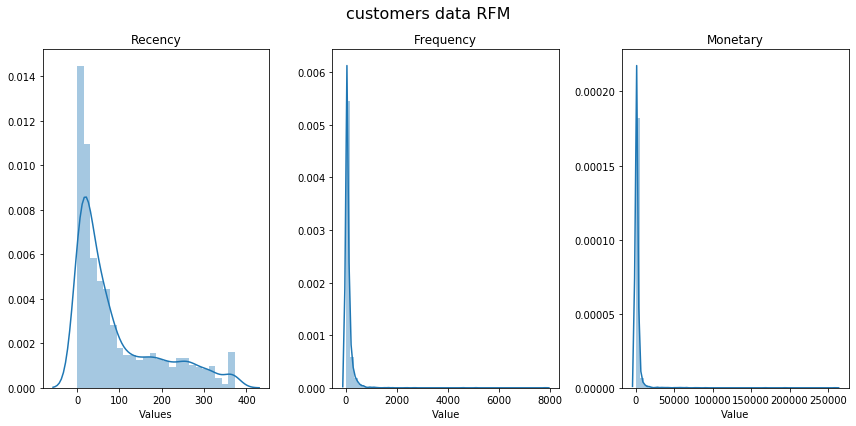

In [331]:
## plotting RFM for customers
fig, ax = plt.subplots(1, 3, figsize=(12,6))
sns.distplot(customers.recency, ax=ax[0])
ax[0].set_title('Recency')
ax[0].set_xlabel('Values')
sns.distplot(customers.frequency, ax=ax[1])
ax[1].set_title('Frequency')
ax[1].set_xlabel('Value')
sns.distplot(customers.monetary, ax=ax[2])
ax[2].set_title('Monetary')
ax[2].set_xlabel('Value')
fig.suptitle('customers data RFM', fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

``` Expected Right Skewed ```

In [332]:
# Build RFM Score
rfm['score'] = rfm[['R','F','M']].sum(axis=1)
# show 5 samples
rfm.sample(5)

,recency,frequency,monetary,R,F,M,score
CustomerID,,,,,,,
15592.0,46,24,388.58,3,2,2,7.0
18257.0,39,118,2337.63,3,4,4,11.0
13761.0,50,70,1070.65,3,3,3,9.0
12917.0,128,2,594.00,2,1,2,5.0
14465.0,246,130,1058.62,1,4,3,8.0


In [341]:
#### Who should we include in designer shopper group
### Binning the score into tiers
def score_tier(rfm):
    if rfm['score'] >= 9.0:
        return 'High'
    elif (rfm['score'] > 5.0) and (rfm['score'] <9.0):
        return 'Average'
    else:
        return 'Low'
rfm['tier'] = rfm.apply(score_tier, axis=1)
rfm

,recency,frequency,monetary,R,F,M,score,tier
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,4,6.0,Average
12747.0,2,103,4196.01,4,4,4,12.0,High
12748.0,0,4596,33719.73,4,4,4,12.0,High
12749.0,3,199,4090.88,4,4,4,12.0,High
12820.0,3,59,942.34,4,3,3,10.0,High
...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1,3.0,Low
18281.0,180,7,80.82,1,1,1,3.0,Low
18282.0,7,12,178.05,4,1,1,6.0,Average


In [342]:
## count of shopper in each tier
rfm['tier'].value_counts()

High       1524
Average    1234
Low        1163
Name: tier, dtype: int64

In [344]:
## peak into some of these high, average, low Customers
# Customers tagged high 
v = rfm.loc[rfm['tier']=='High']
df.loc[df['CustomerID'] == v.index[10]] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
169861,551269,21933,PINK VINTAGE PAISLEY PICNIC BAG,20,4/27/2011 12:21,1.65,12840.0,United Kingdom
169862,551269,37342,POLKADOT COFFEE CUP & SAUCER PINK,24,4/27/2011 12:21,0.79,12840.0,United Kingdom
169863,551269,22520,CHILDS GARDEN TROWEL BLUE,12,4/27/2011 12:21,0.85,12840.0,United Kingdom
169864,551269,22518,CHILDS GARDEN BRUSH BLUE,6,4/27/2011 12:21,2.10,12840.0,United Kingdom
169865,551269,22521,CHILDS GARDEN TROWEL PINK,12,4/27/2011 12:21,0.85,12840.0,United Kingdom
...,...,...,...,...,...,...,...,...
269386,560448,22384,LUNCH BAG PINK POLKADOT,20,7/19/2011 9:29,1.65,12840.0,United Kingdom
269387,560448,23206,LUNCH BAG APPLE DESIGN,20,7/19/2011 9:29,1.65,12840.0,United Kingdom
269388,560448,21932,SCANDINAVIAN PAISLEY PICNIC BAG,10,7/19/2011 9:29,1.65,12840.0,United Kingdom
269389,560448,21936,RED RETROSPOT PICNIC BAG,10,7/19/2011 9:29,2.95,12840.0,United Kingdom


In [349]:
# Customrer tagged Average 
v = rfm.loc[rfm['tier']=='Average']
df.loc[df['CustomerID'] == v.index[2]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
91816,544155,48138,DOORMAT UNION FLAG,40,2/16/2011 12:15,7.65,12823.0,United Kingdom
100170,544807,48138,DOORMAT UNION FLAG,30,2/23/2011 15:03,7.65,12823.0,United Kingdom
138932,548245,48138,DOORMAT UNION FLAG,60,3/30/2011 10:36,7.65,12823.0,United Kingdom
291189,562434,48138,DOORMAT UNION FLAG,30,8/4/2011 17:45,7.65,12823.0,United Kingdom
360208,568214,48138,DOORMAT UNION FLAG,70,9/26/2011 7:35,7.65,12823.0,United Kingdom


In [352]:
# Customer  tagged low 
v = rfm.loc[rfm['tier']=='Low']
df.loc[df['CustomerID'] == v.index[20]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
77073,C542693,15036,ASSORTED COLOURS SILK FAN,-600,1/31/2011 12:36,0.65,12908.0,United Kingdom
77074,542694,15036,ASSORTED COLOURS SILK FAN,600,1/31/2011 12:37,0.53,12908.0,United Kingdom
229717,557092,15036,ASSORTED COLOURS SILK FAN,600,6/16/2011 15:39,0.72,12908.0,United Kingdom
392671,C570708,M,Manual,-600,10/12/2011 10:11,0.19,12908.0,United Kingdom


# Conclusion:
#### The high tier can be classified as our best Customers. Thus are loyality customers and effort should be made to retain them
#### The average tier shopper's we can dig further to find what attracts them, do they buy on discounts, if their receny is high or reached next predicted purchased data send them deals... to bring them back to site.. Basically more analysis needs to be done to learn the patterns in this group.
#### The low tier shopper either has very high recency and/or very low frequency and/or very low monetary value which means that they either come on site for very cheaper items, shoppers hasn't purchased any item in a long time and is becoming a sleeper c.

# Caveat

#### The caveat with above approach is the scoring technique. The customers with different buying habits(e.g. different recency values) can fall on the same score bins and thus be ranked into high tier. For example Customer with [R,F,M] = [4,4,1] will be ranked as [1,4,4]. 